In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("autos.csv")
df.head()

,name,year,selling_price,present_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,source
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN,car data.csv
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN,car data.csv
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN,car data.csv
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN,car data.csv
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN,car data.csv


In [5]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

columnas_deseadas = ["name", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", "owner"]
df = df[columnas_deseadas]

print("\nColumnas que quedaron en el DataFrame:")
print(df.columns)

print("\nPrimeras filas del DataFrame limpio:")
print(df.head())

print(df["owner"].unique())

Valores faltantes por columna:
name                 0
year                 0
selling_price        0
present_price    14527
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage           6921
engine            4942
max_power         4936
torque            4943
seats             4926
source               0
dtype: int64

Columnas que quedaron en el DataFrame:
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Primeras filas del DataFrame limpio:
      name  year  selling_price  km_driven    fuel seller_type transmission  \
0     ritz  2014           3.35      27000  Petrol      Dealer       Manual   
1      sx4  2013           4.75      43000  Diesel      Dealer       Manual   
2     ciaz  2017           7.25       6900  Petrol      Dealer       Manual   
3  wagon r  2011           2.85       5200  Petrol      Dealer       Manual   
4    sw

In [7]:
df["owner"] = df["owner"].replace({
    '3': '4',
    '1': '2',
    '0': '1',
    'First Owner': '1',
    'Second Owner': '2',
    'Third Owner': '3',
    'First': '1',
    'Second': '2',
    'Third': '3',
    'Fourth': '4',
    '4 or More': '5',
    'Fourth & Above Owner': '5',
    'Test Drive Car': '0',
    'UnRegistered Car': '0'
})

df["owner"] = df["owner"].astype(int)

In [9]:
df["brand"] = df["name"].apply(lambda x: x.split()[0])

In [11]:
df.drop("name", axis=1, inplace=True)

In [13]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
print("Clases codificadas:", dict(zip(le.classes_, le.transform(le.classes_))))

Clases codificadas: {'CNG': 0, 'CNG + CNG': 1, 'Diesel': 2, 'Electric': 3, 'Hybrid': 4, 'LPG': 5, 'Petrol': 6, 'Petrol + CNG': 7, 'Petrol + LPG': 8}


In [15]:
y = df["fuel"]
X = df.drop("fuel", axis=1)

In [17]:
print("Columnas actuales en X:")
print(X.columns)

Columnas actuales en X:
Index(['year', 'selling_price', 'km_driven', 'seller_type', 'transmission',
       'owner', 'brand'],
      dtype='object')


In [19]:
X = pd.get_dummies(X, columns=["brand", "seller_type", "transmission"], drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (11862, 90)
Tamaño de X_test: (2966, 90)


In [23]:
modelo = RandomForestClassifier(
    n_estimators=100,   
    max_depth=None,     
    random_state=42     
)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8567093728927849

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00         1
           2       0.85      0.90      0.87      1480
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       0.25      0.09      0.13        11
           6       0.87      0.84      0.85      1446
           8       0.00      0.00      0.00         0

    accuracy                           0.86      2966
   macro avg       0.31      0.35      0.32      2966
weighted avg       0.85      0.86      0.85      2966



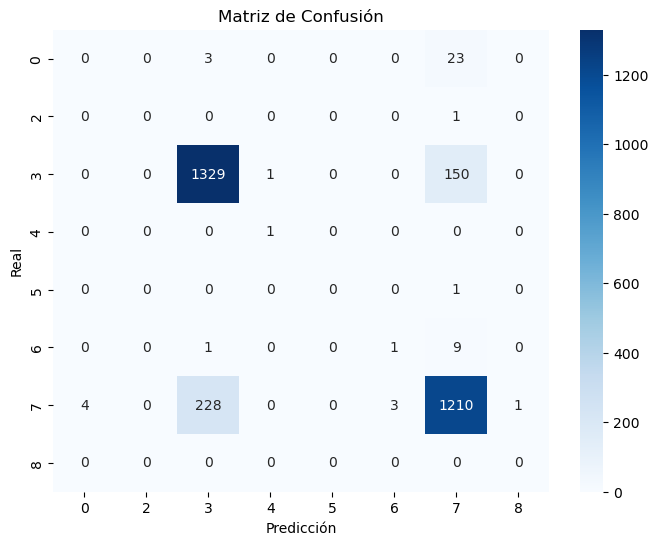

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

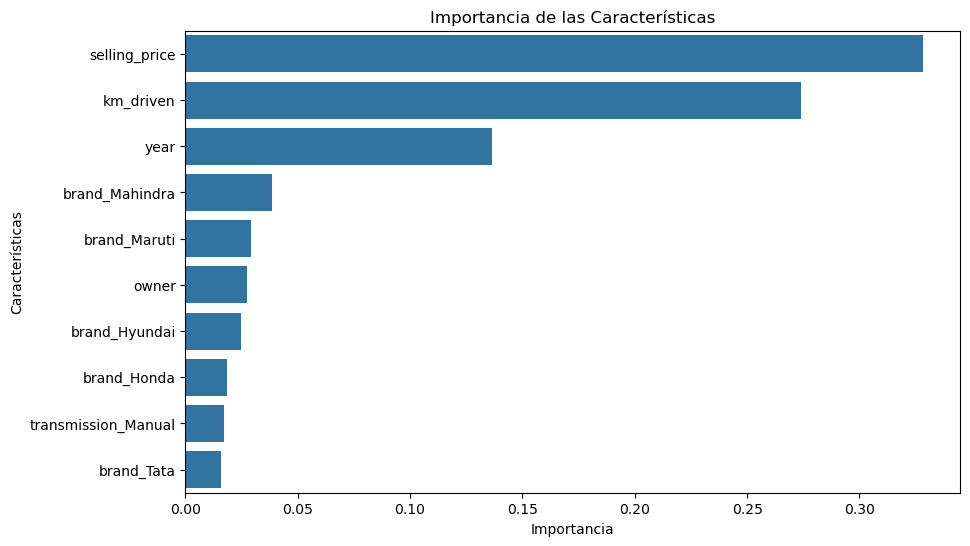

In [27]:
importancias = modelo.feature_importances_
nombres_caracteristicas = X.columns
indices_ordenados = np.argsort(importancias)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias[indices_ordenados[:10]], y=nombres_caracteristicas[indices_ordenados[:10]])
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()